# Лабораторная работа 6. Динамическое программирование.

# Домашнее задание (базовое):

# Задание №1. Гиперкузнечик.

Решите задачу о количестве способов достичь точки n из точки 1, если кузнечик умеет прыгать +1, +2 и +3.

In [ ]:
#За основу взята функция из начала урока, после тестирования оказалось, что из 3х она самая быстрая

def Fibonacci_kuz(n):
    fib = [0] * max(0, n + 1)
    fib[0] = 0
    fib[1] = 1
    fib[2] = 2
    fib[3] = 3
    for i in range(4, n + 1):
        fib[i] = fib[i - 1] + fib[i - 2] + fib[i - 3]
        
    return fib[n]

In [ ]:
Fibonacci_kuz(4)

6

# Задание №2. Наибольшая общая подпоследовательность.

Рассмотрим две строки (или числовые последовательности) A и B. Пусть первая строка состоит из n символов $a_0, ... a_n$, вторая строка состоит из m символов $b_0, ..., b_m$. Подпоследовательностью данной строки (последовательности) называется некоторое подмножество символов исходной строки, следующих в том же порядке, в котором они идут в исходной строке, но не обязательно подряд. Если в строке n символов, то у нее $2^n$ различных подпоследовательностей: каждый из n символов строки может либо входить, либо не входить в любую выбранную подпоследовательность. Пустая подпоследовательность не содержит ни одного элемента и также является подпоследовательностью любой строки.

Рассмотрим задачу для двух данных строк найти такую строку наибольшей длины, которая была бы подпоследовательностью каждой из них. Например, если A='abcabaac', B='baccbca' то у строк A и B них есть общая подпоследовательность длины 4, например, 'acba' или 'acbc'.

Данную задачу можно решить перебором  например, перебрав все $2^n$ подпоследовательностей первой строки и для каждой их них проверив, является ли она подпоследовательностью второй строки. Но при помощи динамического программирования эту же задачу можно решить за сложность O(nm).

Напишите программу решающую данную задачу с помощью алгоритма, полученного на основе динамического программирования. 

In [ ]:
def max_sub(A,B, m, n):
  F = [[0] * (m + 1) for i in range(n + 1)]
  for i in range(1, n + 1):
    for j in range(1, m + 1):
        if A[i - 1] == B[j - 1]:
            F[i][j] = F[i - 1][j - 1] + 1 
        else: 
            F[i][j] = max(F[i - 1][j], F[i][j - 1]) 
  return F

#Восстановление ответа
def answer(A,B, F):
  Ans = []
  i = n
  j = m
  while i > 0 and j > 0:
    if A[i - 1] == B[j - 1]:
        Ans.append(A[i - 1])
        i -= 1
        j -= 1
    elif F[i - 1][j] == F[i][j]:
        i -= 1 
    else: 
        j -= 1 
  Ans = Ans[::-1]
  return Ans

In [ ]:
#Выясняем, какого размера максимальная построка
A = ['a','b','c','a','b','a','a','c']
B = ['b','a','c','c','b','c','a']
n = len(A)
m = len(B)

F = max_sub(A,B, m, n)
ans = answer(A,B, F)
print(F[n][m], ans)


4 ['a', 'b', 'c', 'a']


# Задание №3. 

Даны две последовательности целых чисел $a_0, ... a_n$ и $b_0, ..., b_m$. Выяснить, является ли вторая последовательность подпоследовательностью первой, то есть можно ли из первой вычеркнуть некоторые члены так, чтобы осталась вторая.

In [ ]:
A = ['a','b','c','a','b','a','a','c']
B = ['a','b','c','c']
n = len(A)
m = len(B)

F = max_sub(A,B, m, n)
ans = answer(A,B, F)
print(F[n][m], ans)

4 ['a', 'b', 'c', 'c']


In [ ]:
if F[n][m] == m:
  print('Yes')
else: 
  print('No')

Yes


# Задание №4. Мячик на лесенке.

На вершине лесенки, содержащей N ступенек, находится мячик, который начинает прыгать по ним вниз, к основанию. Сначала мячик может прыгнуть максимум на N/2, но с каждым ударом о ступеньку эта величина сокращается вдвое пока он не начинает катиться, перекатываясь с одной ступеньке на другую. Так мячик может прокатиться ещё N/16 ступенек. 

Определите число всевозможных "маршрутов" мячика и найдите максимально возможную длину лестницы N.

In [ ]:
#СУТЬ: каждый раз смотрим, сколькими путями мы можем пройти оставшееся количество ступенек и прибавляем это количество к имеющемуся
#возможно рассмотрение обратного решения, не от оставшегося количества, а смотреть, сколькими способами мы можем добраться с первой ступеньки на последнюю (задача наоборот)


In [ ]:
#Суть: на каждую ступеньку мы можем попасть с N_start*2 ступеньки N_start способами.
#N1=N2 = 8
#N2=N4*2 = 8
#N3=N6*3 = 6
#N4=N8*4 = 4
#N5 = 3
#N6 = 2    
#N7 = 1    
#N8 = 1   

N_start = 8
def step_counter(N_start):
  N_start = N_start*2
  for i in range(1, N_start):   
    if  i > (N_start//2):
      return N_start - i + 1
    else:
      steps = (N_start*2)*N_start

print(step_counter(N_start) + N_start//16)




8


# Домашнее задание (дополнительное):

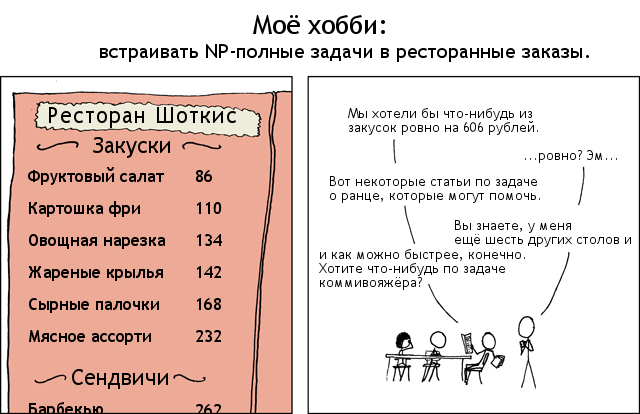

In [ ]:
# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("официант.png")             # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

# Задача о рюкзаке.

Решите задачу о рюкзаке методом динамического программирования.

Естественно важно правильно выбрать подзадачи. В данном случае есть два естественных способа: рассмотреть рюкзак меньшей ёмкости или же меньшее число предметов. 

Для того чтобы понять, какой подход действительно работает, обычно приходится немного поэкспериментировать.

In [ ]:
 #Разобранное решение,
 #За основу взят материал:
#https://proglib.io/p/python-i-dinamicheskoe-programmirovanie-na-primere-zadachi-o-ryukzake-2020-02-04

In [ ]:
#Начальный список
#{'название предмета':(площадь, ценность) }
stuffdict = {'couch_s':(300,75), 
             'couch_b':(500,80), 
             'bed':(400,100), 
             'closet':(200,50), 
             'bed_s':(200,40), 
             'desk':(200,70), 
             'table':(300,80),
             'tv_table':(200,30),
             'armchair':(100,30),
             'bookshelf':(200,60), 
             'cabinet':(150,20),
             'game_table':(150,30),
             'hammock':(250,45),
             'diner_table_with_chairs':(250,70),
             'stools':(150,30),
             'mirror':(100,20),
             'instrument':(300,70),
             'plant_1':(25,10),
             'plant_2':(30,20),
             'plant_3':(45,25),
             'sideboard':(175,30),
             'chest_of_drawers':(25,40),
             'guest_bed':(250,40),
             'standing_lamp':(20,30), 
             'garbage_can':(30,35), 
             'bar_with_stools':(200,40), 
             'bike_stand':(100,80),
             'chest':(150,25),
             'heater':(100,25)
            }


In [ ]:
#Разделяем списки значений исходного словаря:
def get_area_and_value(stuffdict):
    area = [stuffdict[item][0] for item in stuffdict]
    value = [stuffdict[item][1] for item in stuffdict]        
    return area, value  
#Теперь у нас два списка

In [ ]:
#Мемоизация (хэширование)
#n #общее число предметов
#A #максимальная площадь рюкзака
#Составим таблицу из n + 1 строк и A + 1 столбцов

def get_memtable(stuffdict, A=2000):
      area, value = get_area_and_value(stuffdict)
      n = len(value) # находим размеры таблицы
      
      # создаём таблицу из нулевых значений
      V = [[0 for a in range(A+1)] for i in range(n+1)]

      for i in range(n+1):
            for a in range(A+1):
                  # базовый случай
                  if i == 0 or a == 0:
                        V[i][a] = 0

                  # если площадь предмета меньше площади столбца,
                  # максимизируем значение суммарной ценности
                  elif area[i-1] <= a:
                        V[i][a] = max(value[i-1] + V[i-1][a-area[i-1]], V[i-1][a])

                  # если площадь предмета больше площади столбца,
                  # забираем значение ячейки из предыдущей строки
                  else:
                        V[i][a] = V[i-1][a]       
      return V, area, value

In [ ]:
#Забираем нужные элементы из последней строки таблицы
def get_selected_items_list(stuffdict, A=2000):
      V, area, value = get_memtable(stuffdict)
      n = len(value)
      res = V[n][A]      # начинаем с последнего элемента таблицы
      a = A              # начальная площадь - максимальная
      items_list = []    # список площадей и ценностей
    
      for i in range(n, 0, -1):  # идём в обратном порядке
            if res <= 0:  # условие прерывания - собрали "рюкзак" 
                  break
            if res == V[i-1][a]:  # ничего не делаем, двигаемся дальше
                  continue
            else:
                  # "забираем" предмет
                  items_list.append((area[i-1], value[i-1]))
                  res -= value[i-1]   # отнимаем значение ценности от общей
                  a -= area[i-1]  # отнимаем площадь от общей
            
      selected_stuff = []

      # находим ключи исходного словаря - названия предметов
      for search in items_list:
            for key, value in stuffdict.items():
                  if value == search:
                        selected_stuff.append(key)
            
      return selected_stuff

# Задача коммивояжёра.

Коммивояжёр должен посетить по разу каждый город из большого списка и вернуться в свой родной город. Он знает расстояния между всеми парами городов. В каком порядке лучше всего посещать города, чтобы минимизировать пройденное расстояние?

Если перебирать все маршруты (их $(n-1)!$), потребуется время $O(n!)$ (вычисление длины маршрута производится за время $O(n)$). Однако, динамическое программирование позволяет решить эту задачу быстрее, хоть и не слишком.

При испотльзовании динамического программирования поскольку мы ищем маршрут, естественной подзадачей является нахождение начальной части маршрута. Предположим, мы вышли из города 1, посетили несколько городов и сейчас находимся в городе j. Существенной информацией об этом частичном маршруте является где мы находимся (j), а также где мы уже побывали (чтобы не идти туда второй раз). Это и приводит нас к необходимой подзадаче.

Всего есть не более $2^nn$ подзадач, и решение для каждой из них находится за линейное время. Поэтому общее время работы есть $O(n^22^n)$.

In [ ]:
# Алгоритм Дейкстры
#Существуют и другие алгоритмы решения (Флойда, Прима, и т.д.)

def dijkstra(G, startNode):
  Visited = {} # хэш посещенных вершин (узел -> стоимость)
  ToVisit = {startNode: 0} # соседи посещенных (уз. -> стоим.)
  Paths = {startNode:[startNode]} # узел -> кратчайший путь
  while ToVisit: # пока есть куда стремиться
    v = argmin(ToVisit) # выбираем ближайшую
    Visited[v] = ToVisit[v] # фиксируем откуда пришли в v
    del ToVisit[v] # кратчайший путь к v найден
    for w in G.neighbors(v): # для всех соседей вершины v
      if w not in Visited: # еще не нашли кратчайший путь
        # обновляем кратчайшие пути
        vwLength = Visited[v] + G[v][w]
        if w not in ToVisit or vwLength < ToVisit[w]:
          ToVisit[w] = vwLength # обновляем цену
          Paths[w] = Paths[v] + [w] # посещения соседа
    return Visited, Paths